In [94]:
import pandas as pd
import numpy as np
# to make this notebook's output stable across runs. 
np.random.seed(42)

In [95]:
X = pd.read_csv("/Users/Hookay/Desktop/Weka/Road signs/dataprep/Python/x_train_gr_smpl.csv")

In [96]:
Y = pd.read_csv("/Users/Hookay/Desktop/Weka/Road signs/dataprep/Python/y_train_smpl.csv")

In [97]:
Y=np.ravel(Y)

In [98]:
Y.shape

(9690,)

In [99]:
from scipy.sparse import coo_matrix
coo_X = coo_matrix(X)

In [100]:
from sklearn.utils import shuffle
#X_sparse to keep track of position and data
X, coo_X, Y = shuffle(X, coo_X, Y, random_state=0)

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.35, random_state=42)

In [120]:
y_expect = y_test

In [121]:
y_train=np.ravel(y_train)
from sklearn.naive_bayes import MultinomialNB
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
y_pred = MultiNB.predict(X_test)
# ACCURACY
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_expect, y_pred))

Accuracy: 0.36202830188679247


In [122]:
# Recall
from sklearn.metrics import recall_score
print("Recall:",recall_score(y_expect, y_pred, average=None))

Recall: [0.45205479 0.16496164 0.30051151 0.42332613 0.63776224 0.75862069
 0.03100775 0.50632911 0.24873096 0.23529412]


In [123]:
# Precision
from sklearn.metrics import precision_score
print("Precision:",precision_score(y_expect, y_pred, average=None))

Precision: [0.10963455 0.43581081 0.46534653 0.32885906 0.41044104 0.31279621
 0.05063291 0.33613445 0.56976744 0.22727273]


In [124]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
# this is for the multinomial
print(confusion_matrix(y_expect, y_pred))

[[ 33   8  17   9   5   0   1   0   0   0]
 [167 129 121 104 209   1  28   5   6  12]
 [ 51  61 235  99 304   2  12   5   1  12]
 [ 32  38  62 196 129   0   2   0   1   3]
 [ 17  55  42 116 456   0  16   0   0  13]
 [  0   0   6   0   0  66   0   3  10   2]
 [  0   1   4  38   1  36   4  24  15   6]
 [  0   0   0  11   1  17   1  40   3   6]
 [  1   0   3  11   2  66  15  36  49  14]
 [  0   4  15  12   4  23   0   6   1  20]]



 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


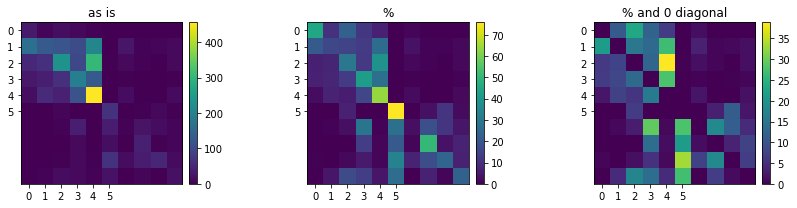

In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
cmx= confusion_matrix(y_expect, y_pred)
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(6)) for a in ax]
    [a.set_yticks(range(6)) for a in ax]
 
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1)
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
 
plot_confusion_matrix(cmx)
 
# the types appear in this order
print('\n', sorted(np.unique(y_expect)))

In [126]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
# run NB - BernoulliNB
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)

y_expect = y_test
y_predB = BernNB.predict(X_test)
print("Accuracy:",accuracy_score(y_expect, y_predB))

Accuracy: 0.23054245283018868


In [127]:
# Recall
from sklearn.metrics import recall_score
print("Recall:",recall_score(y_expect, y_predB, average=None))

Recall: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [128]:
# Precision
from sklearn.metrics import precision_score
print("Precision:",precision_score(y_expect, y_predB, average=None))

Precision: [0.         0.         0.23054245 0.         0.         0.
 0.         0.         0.         0.        ]


/Users/Hookay/opt/anaconda3/envs/F21DL/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_expect, y_predB))

[[  0   0  73   0   0   0   0   0   0   0]
 [  0   0 782   0   0   0   0   0   0   0]
 [  0   0 782   0   0   0   0   0   0   0]
 [  0   0 463   0   0   0   0   0   0   0]
 [  0   0 715   0   0   0   0   0   0   0]
 [  0   0  87   0   0   0   0   0   0   0]
 [  0   0 129   0   0   0   0   0   0   0]
 [  0   0  79   0   0   0   0   0   0   0]
 [  0   0 197   0   0   0   0   0   0   0]
 [  0   0  85   0   0   0   0   0   0   0]]



 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


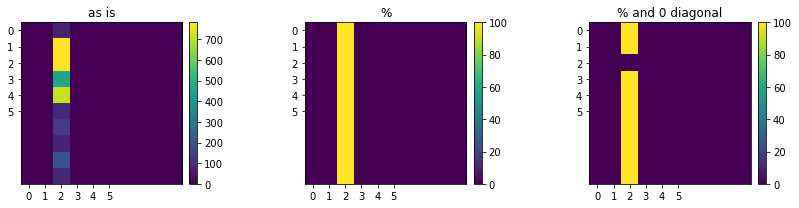

In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
cmx= confusion_matrix(y_expect, y_predB)
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(6)) for a in ax]
    [a.set_yticks(range(6)) for a in ax]
 
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1)
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
 
plot_confusion_matrix(cmx)
 
# the types appear in this order
print('\n', sorted(np.unique(y_expect)))

In [131]:
from sklearn.naive_bayes import GaussianNB
# run NB - Gaussian
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
y_predG = GausNB.predict(X_test)
print("Accuracy:",accuracy_score(y_expect, y_predG))

Accuracy: 0.2361438679245283


In [132]:
# Recall
from sklearn.metrics import recall_score
print("Recall:",recall_score(y_expect, y_predG, average=None))

Recall: [0.7260274  0.21867008 0.16240409 0.22678186 0.18041958 0.17241379
 0.68992248 0.51898734 0.24873096 0.25882353]


In [133]:
# Precision
from sklearn.metrics import precision_score
print("Precision:",precision_score(y_expect, y_predG, average=None))

Precision: [0.15229885 0.38952164 0.42474916 0.44117647 0.40694006 0.75
 0.08098271 0.08686441 0.75384615 0.23157895]


In [134]:
print(confusion_matrix(y_expect, y_pred))

[[ 33   8  17   9   5   0   1   0   0   0]
 [167 129 121 104 209   1  28   5   6  12]
 [ 51  61 235  99 304   2  12   5   1  12]
 [ 32  38  62 196 129   0   2   0   1   3]
 [ 17  55  42 116 456   0  16   0   0  13]
 [  0   0   6   0   0  66   0   3  10   2]
 [  0   1   4  38   1  36   4  24  15   6]
 [  0   0   0  11   1  17   1  40   3   6]
 [  1   0   3  11   2  66  15  36  49  14]
 [  0   4  15  12   4  23   0   6   1  20]]



 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


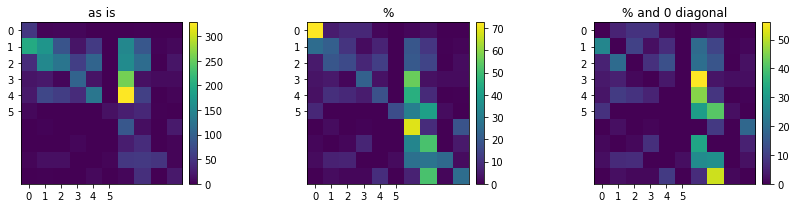

In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
cmx= confusion_matrix(y_expect, y_predG)
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(6)) for a in ax]
    [a.set_yticks(range(6)) for a in ax]
 
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1)
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
 
plot_confusion_matrix(cmx)
 
# the types appear in this order
print('\n', sorted(np.unique(y_expect)))

In [136]:
y_test.shape

(3392,)